<a href="https://colab.research.google.com/github/sdazz56/Data-Science-Projects/blob/main/zomato_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#zomato dataset EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/zomato.csv',encoding='latin-1')
df.head()

In [ ]:
df.columns

In [ ]:
df.info() #objects- strings, categorical variable, integer

In [ ]:
df.describe()

In data analysis what all things we do
1. Missing Values
2. Explore about numerical variables
3. Explore categorical variable
4. Finding relationship between features

In [ ]:
df.isnull().sum()

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0 ]

In [ ]:
df_country=pd.read_excel('/content/Country-Code.xlsx')
df_country

In [ ]:
final_df=pd.merge(df,df_country,on='Country Code', how='left')
final_df.head(2)

In [ ]:
final_df.dtypes

In [ ]:
final_df.columns

In [29]:
country_names=final_df.Country.value_counts().index

In [31]:
country_val=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7fd41cb20b90>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

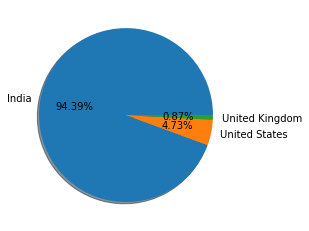

In [37]:
plt.pie(country_val[:3],labels=country_names[:3],shadow=True,autopct='%1.2f%%') #Top 3 countries

Observation: Zomato max records are from india which is 94.4% thereafter US and then UK with 4.7% and 0.9% respectively.

In [45]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [ ]:
rating

Observation


1.rating between 4.5 to 4.9---> Excellent


2.rating between 4.0 to 4.4---> verygood


3.rating between 3.5 to 3.9---> good


4.rating between 3.0 to 3.4---> average


5.rating between 2.5 to 2.9---> average


6.rating between 1.8 to 2.4---> poor

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x="Aggregate rating",y="Rating Count",data= ratings)

In [ ]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',palette=['white','red','orange','yellow','green','green'],data= ratings)

Observation:


1.Not rated count is very high

2.Max number of rating are between 2.5 to 3.4

In [ ]:
sns.countplot(x="Rating color",palette=['blue','red','orange','yellow','green','green'],data= ratings)

In [ ]:
##Find the countries name that has given 0 rating

final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

In [ ]:
##Find out which currency is used by which country

final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index().head()

In [ ]:
#Which coutries do have online delieveries option
final_df[['Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index()


Observation:


Online delieveries only available in India and UAE

In [ ]:
#Pie chart for cities distribution
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index
plt.pie(city_values[:5],labels=city_labels[:5])

In [79]:
#Find top 10 cuisines
cuisine_values=final_df.Cuisines.value_counts().values
cuisine_label=final_df.Cuisines.value_counts().index

([<matplotlib.patches.Wedge at 0x7fd41b7e8fd0>,
 [Text(0.4175823090707363, 1.0176566292965188, 'North Indian'),
  Text(-1.090169487983684, 0.14673270756512372, 'North Indian, Chinese'),
  Text(-0.6326704341218391, -0.8998489438722946, 'Chinese'),
  Text(0.3048764124205039, -1.0569060379946758, 'Fast Food'),
  Text(1.0036916287969155, -0.45011455684413826, 'North Indian, Mughlai')])

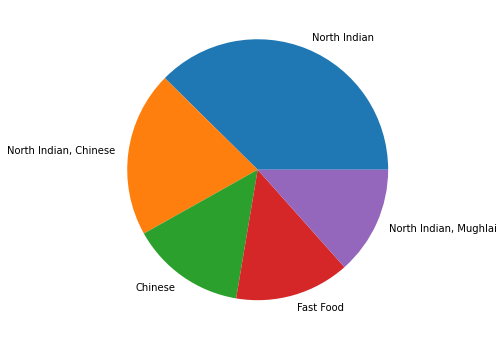

In [81]:
plt.pie(cuisine_values[:5],labels=cuisine_label[:5])

In [73]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
